# Data Preprocessing on Titanic Dataset

## 1. Importing the Libraries

In [634]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## 2. Importing the dataset

In [635]:
df = pd.read_csv('C:/Users/jayvinit/Downloads/archive (2)/Titanic-Dataset.csv')

In [636]:
df.shape

(891, 12)

In [637]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Checking for Null Values

In [638]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 4. Performing Encoding and solving Null Values

In [639]:
le = LabelEncoder()

In [640]:
df['Sex']= le.fit_transform(df['Sex'])

In [641]:
df['Sex'].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

In [642]:
df.dropna(subset=['Embarked'], inplace=True)

In [643]:
df['Embarked'] = le.fit_transform(df['Embarked'])

In [644]:
df['Embarked'].value_counts()

Embarked
2    644
0    168
1     77
Name: count, dtype: int64

In [645]:
df['Survived'].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

In [646]:
df.dropna(subset=['Embarked'],inplace=True)

In [647]:
df.shape

(889, 12)

In [648]:
df['Embarked'].isna().sum()

0

In [649]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [650]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [651]:
df['Cabin'].fillna('unknown', inplace=True)

In [652]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## 5. Data Visualization

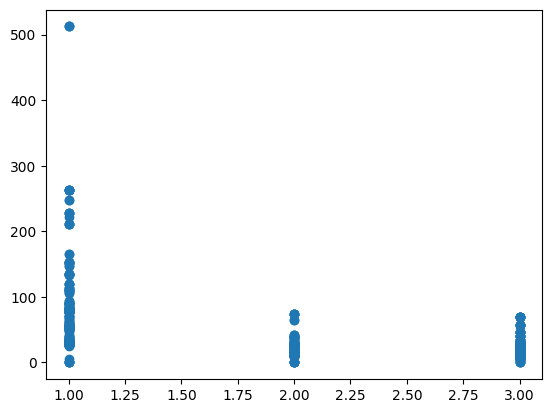

In [653]:
plt.scatter(df['Pclass'],df['Fare'])

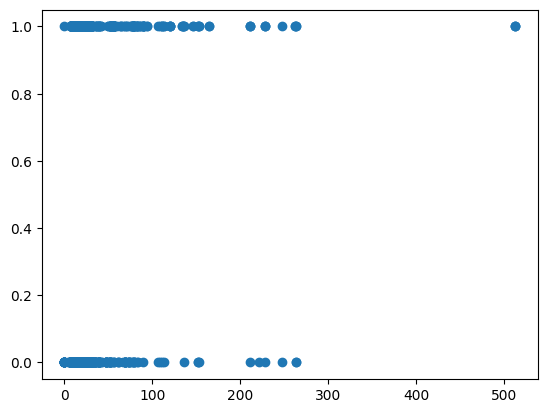

In [654]:
plt.scatter(df['Fare'],df['Survived'])

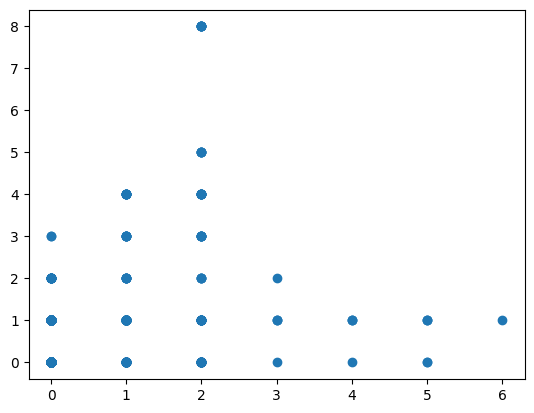

In [655]:
plt.scatter(df['Parch'],df['SibSp'])

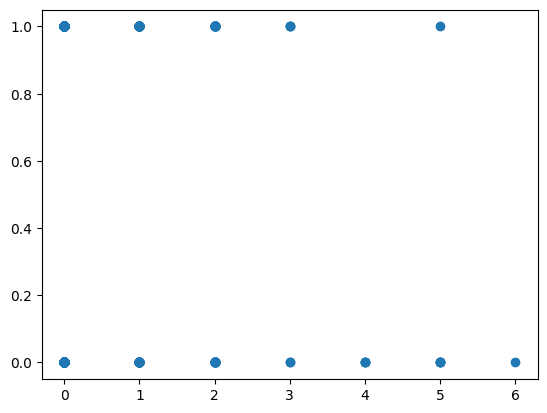

In [656]:
plt.scatter(df['Parch'],df['Survived'])

In [657]:
df= df.drop(['Name','Ticket','Cabin'],axis=1)

<Axes: >

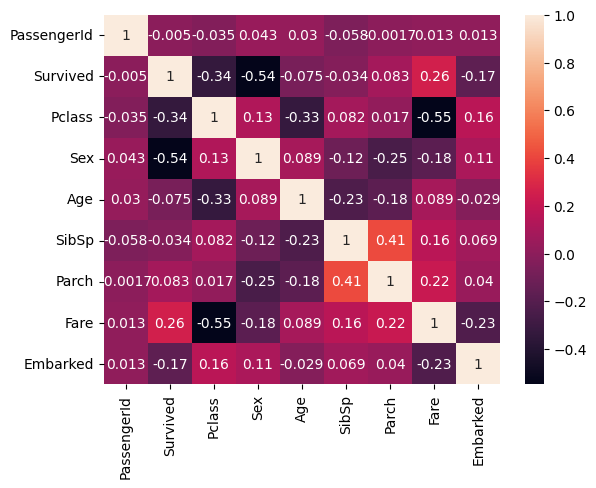

In [658]:
sns.heatmap(df.corr(),annot=True)

In [659]:
# print(sns.pairplot(df))

<Axes: xlabel='Survived', ylabel='Age'>

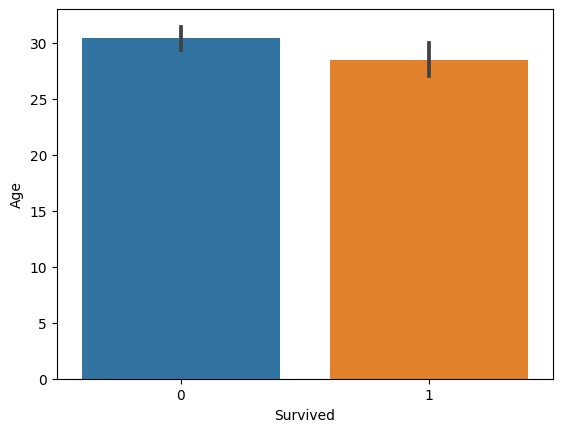

In [660]:
sns.barplot(x=df['Survived'],y=df['Age'])

<Axes: xlabel='Sex', ylabel='Survived'>

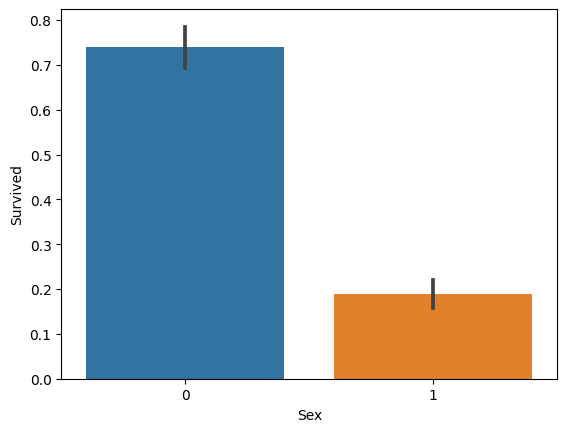

In [661]:
sns.barplot(x=df['Sex'],y=df['Survived'])

## 6. Outlier Detection

<Axes: >

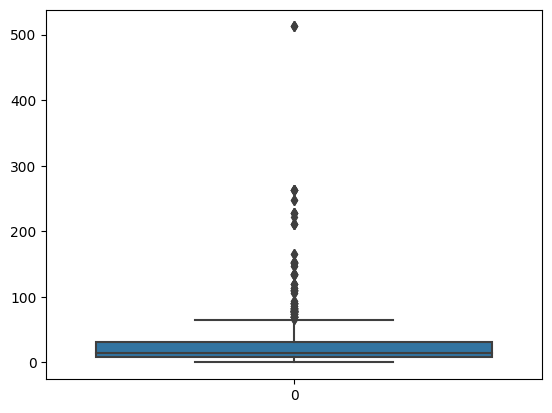

In [662]:
sns.boxplot(df['Fare'])

<Axes: >

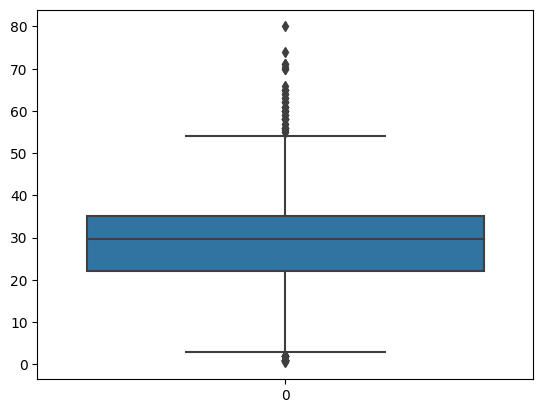

In [663]:
sns.boxplot(df['Age'])

## 7. Splitting Dependent and Independent Variable

In [664]:
y = df["Survived"]
x = df.drop(columns=["Survived"], axis=1)


## 8. Feature Scaling

### Using Min Max Scaler

In [665]:
mms = MinMaxScaler()

In [666]:
mms.fit(x)

MinMaxScaler()

In [667]:
x_minmax_scaled = pd.DataFrame(mms.fit_transform(x),columns=x.columns)

In [668]:
x_minmax_scaled

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.000000,1.0,1.0,0.271174,0.125,0.000000,0.014151,1.0
1,0.001124,0.0,0.0,0.472229,0.125,0.000000,0.139136,0.0
2,0.002247,1.0,0.0,0.321438,0.000,0.000000,0.015469,1.0
3,0.003371,0.0,0.0,0.434531,0.125,0.000000,0.103644,1.0
4,0.004494,1.0,1.0,0.434531,0.000,0.000000,0.015713,1.0
...,...,...,...,...,...,...,...,...
884,0.995506,0.5,1.0,0.334004,0.000,0.000000,0.025374,1.0
885,0.996629,0.0,0.0,0.233476,0.000,0.000000,0.058556,1.0
886,0.997753,1.0,0.0,0.367204,0.125,0.333333,0.045771,1.0
887,0.998876,0.0,1.0,0.321438,0.000,0.000000,0.058556,0.0


### using Standard Scaler

In [669]:
sc = StandardScaler()

In [670]:
x_standardized = pd.DataFrame(sc.fit_transform(x),columns=x.columns)

In [671]:
x_standardized

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,-1.732505,0.825209,0.735342,-5.896199e-01,0.431350,-0.474326,-0.500240,0.586840
1,-1.728611,-1.572211,-1.359911,6.448480e-01,0.431350,-0.474326,0.788947,-1.939555
2,-1.724718,0.825209,-1.359911,-2.810029e-01,-0.475199,-0.474326,-0.486650,0.586840
3,-1.720825,-1.572211,-1.359911,4.133853e-01,0.431350,-0.474326,0.422861,0.586840
4,-1.716931,0.825209,0.735342,4.133853e-01,-0.475199,-0.474326,-0.484133,0.586840
...,...,...,...,...,...,...,...,...
884,1.716931,-0.373501,0.735342,-2.038487e-01,-0.475199,-0.474326,-0.384475,0.586840
885,1.720825,-1.572211,-1.359911,-8.210826e-01,-0.475199,-0.474326,-0.042213,0.586840
886,1.724718,0.825209,-1.359911,-5.482138e-16,0.431350,2.006119,-0.174084,0.586840
887,1.728611,-1.572211,0.735342,-2.810029e-01,-0.475199,-0.474326,-0.042213,-1.939555


## 9. Splitting Data into Train and Test

In [672]:
x_train,x_test,y_train,y_test = train_test_split(x_minmax_scaled,y,test_size = 0.2 , random_state = 3)

In [673]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(711, 8) (178, 8) (711,) (178,)


# Model Building 

## 1. Importing the model building libraries

In [674]:
from sklearn.linear_model import LogisticRegression

In [675]:
lr = LogisticRegression()

## 2. Train the Model

In [676]:
lr.fit(x_train,y_train)

LogisticRegression()

## 3. Test the model

In [677]:
y_train_pred = lr.predict(x_train)

In [678]:
from sklearn.metrics import accuracy_score, r2_score

In [679]:
r2_score(y_train,y_train_pred)

0.19615938630577512

In [680]:
y_test_pred = lr.predict(x_test)

In [681]:
accuracy_score(y_test,y_test_pred)

0.7865168539325843

## 4. Random Value Prediction

In [682]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [683]:
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,2
1,2,1,0,38.0,1,0,71.2833,0
2,3,3,0,26.0,0,0,7.9250,2
3,4,1,0,35.0,1,0,53.1000,2
4,5,3,1,35.0,0,0,8.0500,2


In [684]:
lr.predict(mms.transform([[2,1,0,38,1,0,71.2833,0]]))

c:\Users\jayvinit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\jayvinit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

## 5. Evaluation of Model

In [685]:
from sklearn import metrics

### R2 Score

In [686]:
metrics.r2_score(y_test,y_test_pred)

0.09572192513368982

### mean Squared Error

In [687]:
metrics.mean_squared_error(y_test,y_test_pred)

0.21348314606741572

### Root mean Squared Error

In [688]:
np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))

0.4620423639315076